# Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("bigdatamart_Test.csv")

# Data Inspection

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [5]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [7]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We have same missing values percentage of Item Size and Outlet Size columns as that of in Test set.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [11]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

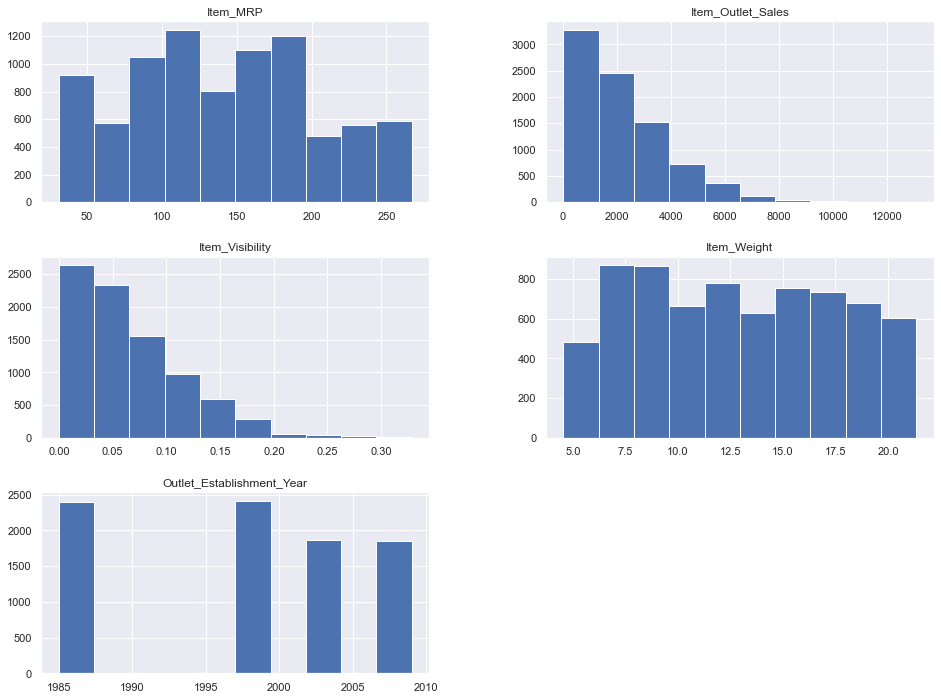

In [14]:
train.hist(figsize=(16,12));

In [15]:
train['Item_Outlet_Sales'] = np.log1p(train['Item_Outlet_Sales'])
train['Item_Visibility'] = np.log1p(train['Item_Visibility'])

In [16]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Outliers is not present

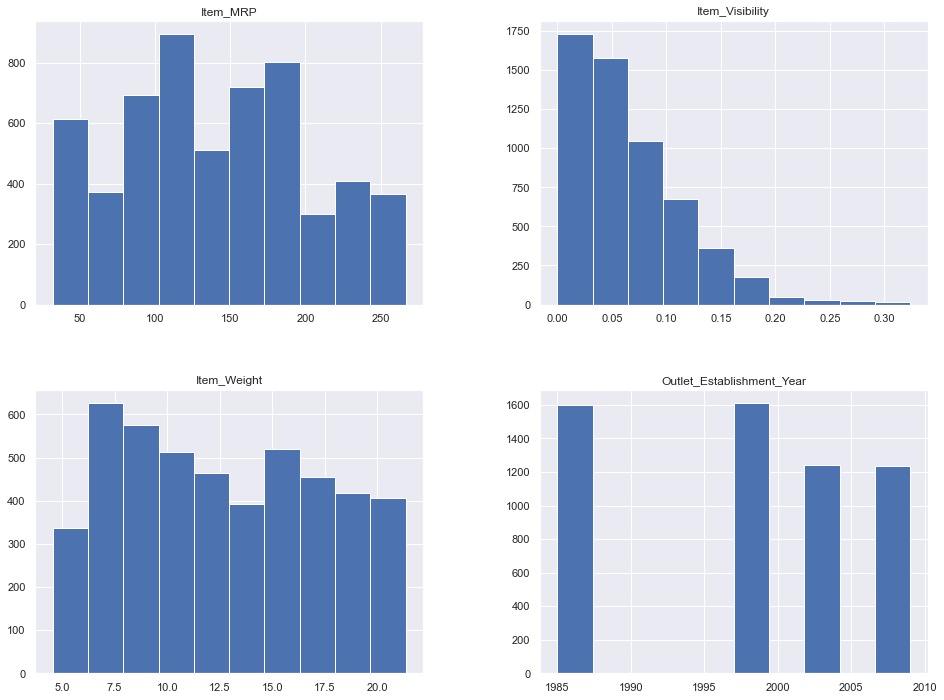

In [17]:
test.hist(figsize=(16,12));

# Data Cleaning

1) Item Size

In [18]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

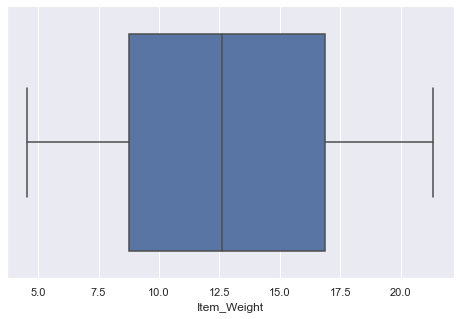

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

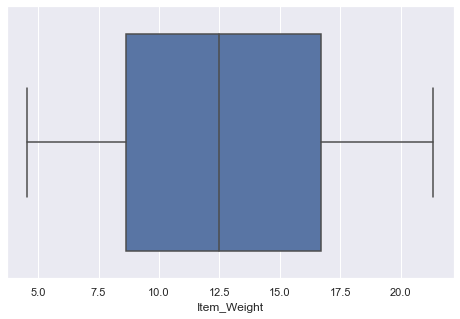

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean

In [22]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [23]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Item_Weight.

2) Outlet Size

In [24]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [25]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [26]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [27]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size.

# Exploratory Data Analysis

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451


In [30]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them

In [31]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [32]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [33]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,21
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,11
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,33


# Univariate Analysis

1) Item Fat Content

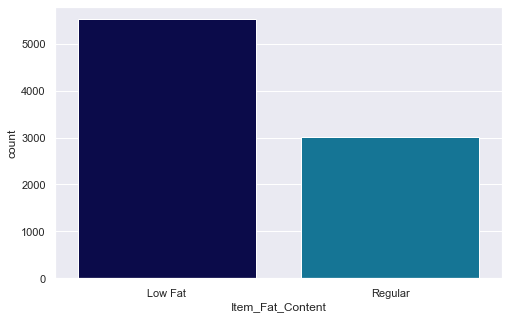

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

Observations:
The Items bought are more of Low Fat.

2) Item Type

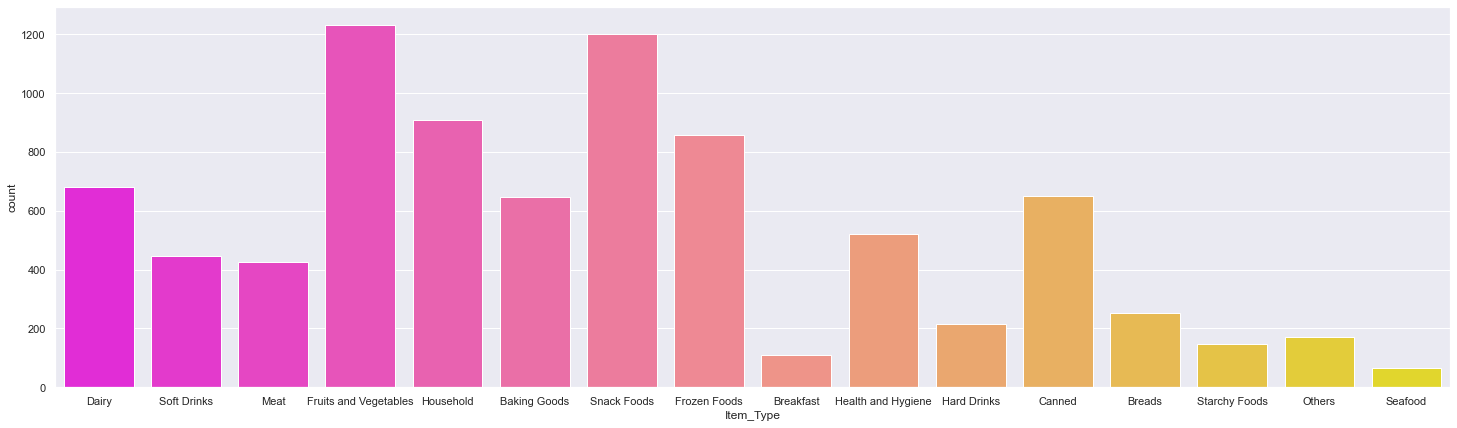

In [36]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

Observations:
Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

3) Outlet Size

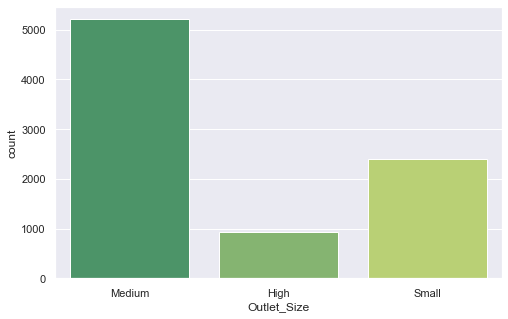

In [37]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

Observations:
The Outlets are more of Medium Size

4) Outlet Location Type

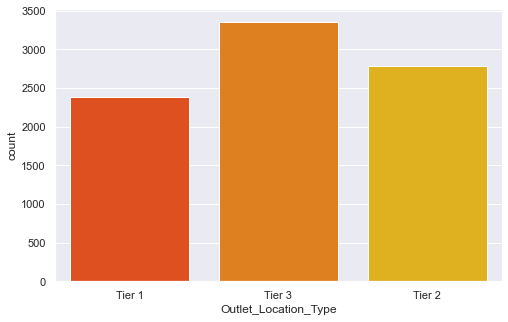

In [38]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

Observations:
The Outlets are maximum in number in Tier 3 Cities.

5) Outlet Type

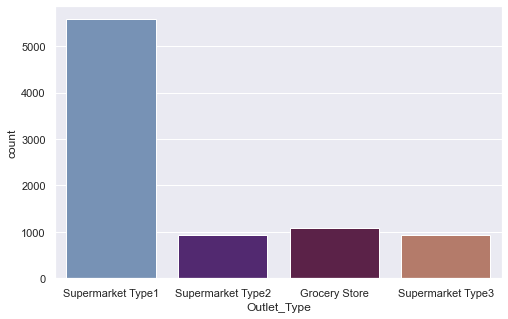

In [39]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

Observations:
The Outlets are more of Supermarket Type1.

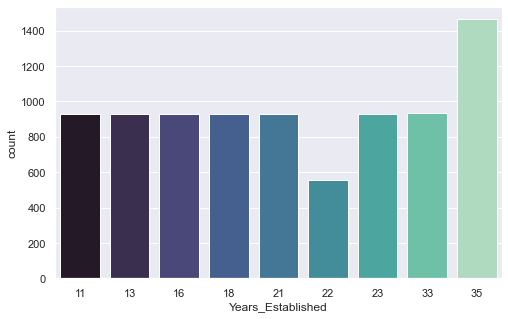

In [40]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=train,palette='mako')

Observations:
The Outlets are more of established and running from 35 years.

# Bivariate Analysis

In [41]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

1) Item Fat Content

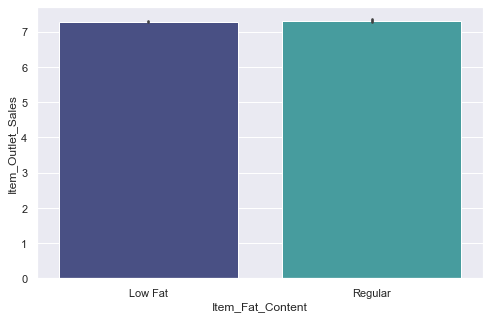

In [42]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='mako')

Observations:
The Item Outles sales are high for both Low Fat and Regular Item types.


2) Item Visibility

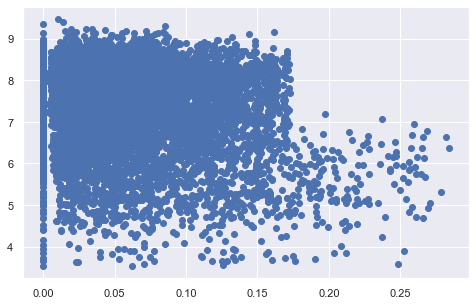

In [43]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)

Observations:
Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Lets consider it like missing information and impute it with mean visibility of that product.

In [44]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

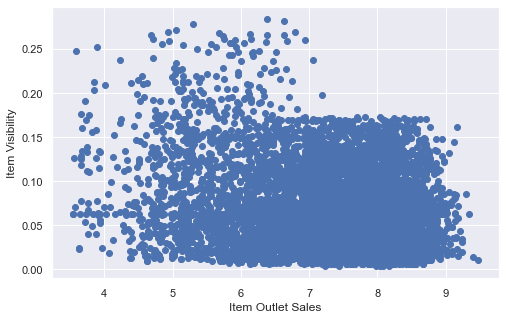

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

3) Item Type

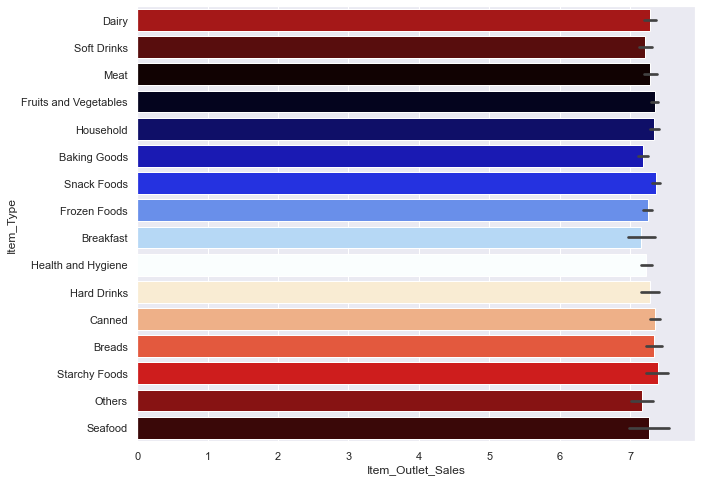

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

Observations:
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Text(0, 0.5, 'Item Outlet Sales')

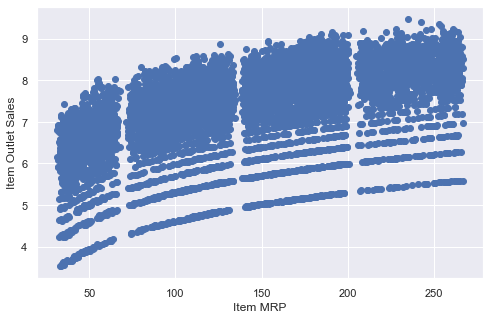

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Observations:
Items MRP ranging from 200-250 dollars is having high Sales.

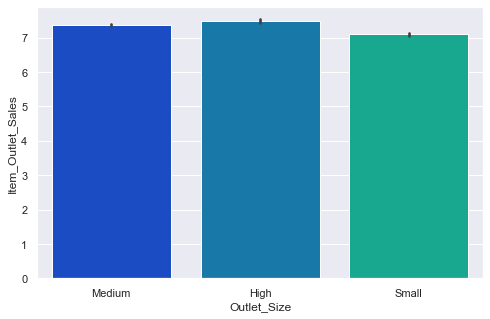

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')

Observations:
The Outlet Sales is maximum for Medium and High sized Outlets.
The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

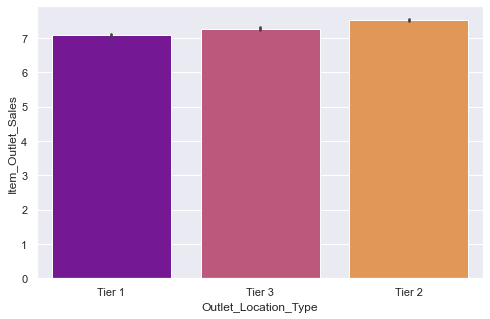

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')

Observations:
The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

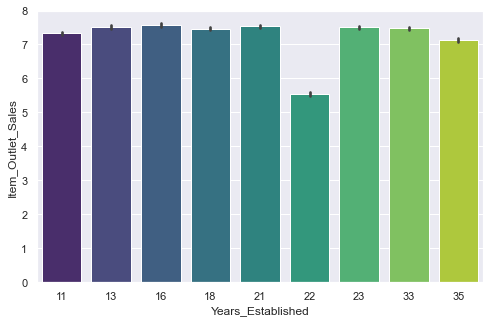

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

Observations:
It is quiet evident that Outlets established 35 years before is having good Sales margin.
We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

# Multivariate Analysis

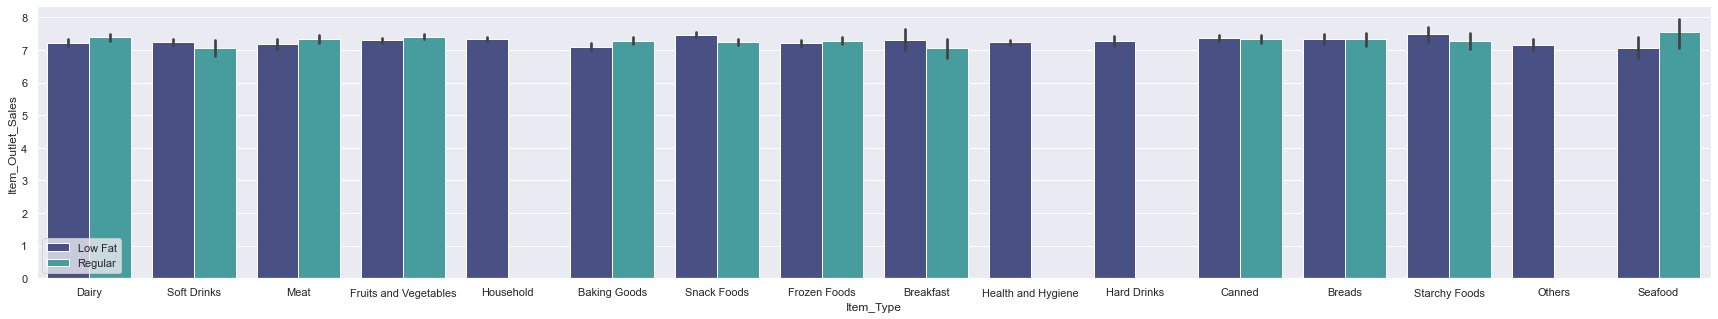

In [51]:
plt.figure(figsize=(30,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

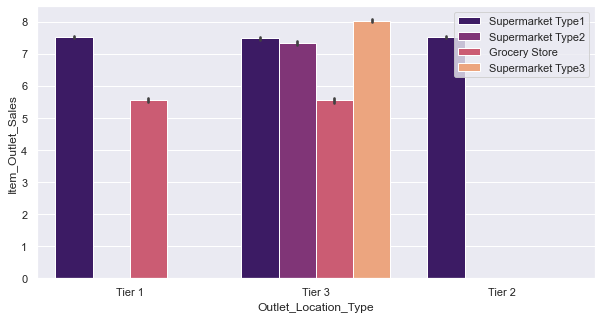

In [52]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

Observations:
The Tier-3 location type has all types of Outlet type and has high sales margin.

# Feature Engineering

In [53]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,21
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,11
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,21
3,FDX07,19.20,Regular,0.062904,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664,22
4,NCD19,8.93,Low Fat,0.062904,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,33


In [54]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.015920,4,249.8092,OUT049,1999,1,0,1,8.225808,21
1,DRC01,5.92,1,0.019095,14,48.2692,OUT018,2009,1,2,2,6.096776,11
2,FDN15,17.50,0,0.016621,10,141.6180,OUT049,1999,1,0,1,7.648868,21
3,FDX07,19.20,1,0.062904,6,182.0950,OUT010,1998,1,2,0,6.597664,22
4,NCD19,8.93,0,0.062904,9,53.8614,OUT013,1987,0,2,1,6.903451,33


There are some columns that needs to be dropped as they don't seem helping our analysis.

In [56]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [57]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

In [58]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= train['Item_Outlet_Sales']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

# Feature Scaling 

In [60]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type',
           'Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

# Building Model

1) Linear regression

In [61]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()

In [62]:
coef2

Item_Visibility        -1.574823
Outlet_Location_Type   -0.462207
Outlet_Size            -0.427739
Years_Established      -0.019219
Item_Type              -0.000379
Item_Weight             0.000104
Item_MRP                0.008507
Item_Fat_Content        0.029591
Outlet_Type             0.771594
dtype: float64

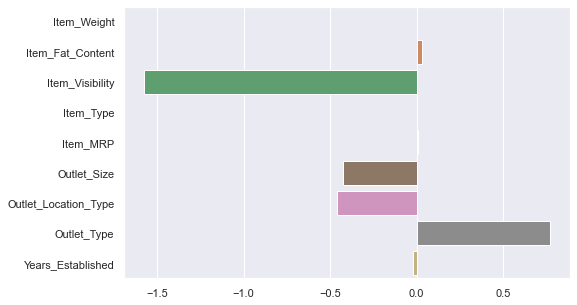

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

# Evaluation Metrics

In [64]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.5813927274742337

In [65]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [66]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.5214176702766391
mean squared error: 0.4338393886715477


In [67]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.6586648530713839


2) Random Forest Regressor

In [68]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [69]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Outlet_Type             6.030365e-01
Item_MRP                3.796154e-01
Years_Established       1.628566e-02
Item_Weight             9.599923e-04
Item_Type               5.561842e-05
Item_Visibility         3.568754e-05
Outlet_Size             1.049899e-05
Item_Fat_Content        6.475119e-07
Outlet_Location_Type    0.000000e+00
dtype: float64

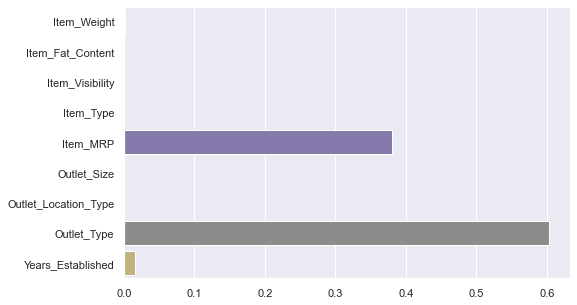

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

In [71]:
R2 = r2_score(y_test,y_pred)
R2

0.7246831818811061

In [72]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [73]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.41253807729409775
mean squared error: 0.285334937787887


In [74]:
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.5341675184695218


In [75]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [76]:
cross_val(LR,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.6
0.59
0.56
0.57
0.6
Average LinearRegression(normalize=True) score: 0.58


In [77]:
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.7
0.69
0.69
0.69
0.72
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.7


Random forest Model clearly did best

# Conclusions

- Item_MRP clearly maximises the Outlet sales.
- Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
- Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.

In [78]:
import joblib
joblib.dump(RF, 'BMS_pkl')

['BMS_pkl']